|  |  |  |
| ---: | :--- | :--- |
| Курс:| Статистический анализ данных | 03 |
| Срок обучения на момент сдачи: | 6 недель |

# Определение перспективного тарифа для телеком компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# План:  
1  [Вводные данные](#1)
*  1.1 [Описание данных](#11)
*  1.2 [Описание тарифов](#12)
*  1.3 [Инструкция по выполнению проекта](#13)

2  [Изучение данных](#2)  

3  [Подготовка данных](#3)  
* 3.1  [Распределение по месяцам](#31)  
  * 3.1.1  [Суммарные данные (общие) - количество звонков, выходов в интернет, смс](#311)  
  * 3.1.2  [Данные по пользователям - количество звонков, израсходованных минут, смс, Гб траффика](#312)    
* 3.2  [Подсчет выручки по месяцам](#32)
* 3.3  [Подсчет абонентской платы](#33)

4  [Анализ данных.](#Analysis_1)  
* 4.1  [Суммарная выручка Москва / не Москва](#Analysis_2)  
* 4.2  [Количество и средняя выручка по тарифам Москав / не Москва](#Analysis_3)
* 4.3  [Сравнение smart / ultra](#Analysis_3)
  * 4.3.1  [Суммарная выручка smart / ultra](#Analysis_3)
  * 4.3.2  [Минут smart / ultra](#Analysis_4)
  * 4.3.3  [Выручка за звонки smart / ultra](#Analysis_5)
  * 4.3.4  [Количество СМС smart / ultra](#Analysis_6)
  * 4.3.5  [Выручка за СМС smart / ultra](#Analysis_7)
  * 4.3.6  [Интернет-трафик smart / ultra](#Analysis_8)      
  * 4.3.7  [Трафик smart / ultra](#Analysis_8)
  * 4.3.8  [Выручка за трафик smart / ultra](#Analysis_9)
* [Сравнительная таблица тарифов](#Table)

5  [Проверка гипотез](#step4)
* 5.1  [средняя выручка пользователей тарифов «Ультра» и «Смарт» различается](#step4_1)
* 5.2  [средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов](#step4_2)  

6.  [Общий выод](#End)

<a name="1"></a>
## Вводные данные

<a name="11"></a>
### Описание данных

**Таблица users (информация о пользователях):**

    user_id — уникальный идентификатор пользователя
    first_name — имя пользователя
    last_name — фамилия пользователя
    age — возраст пользователя (годы)
    reg_date — дата подключения тарифа (день, месяц, год)
    churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    city — город проживания пользователя
    tariff — название тарифного плана

**Таблица calls (информация о звонках):**

    id — уникальный номер звонка
    call_date — дата звонка
    duration — длительность звонка в минутах
    user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**

    id — уникальный номер сообщения
    message_date — дата сообщения
    user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**

    id — уникальный номер сессии
    mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    session_date — дата интернет-сессии
    user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**

    tariff_name — название тарифа
    rub_monthly_fee — ежемесячная абонентская плата в рублях
    minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    messages_included — количество сообщений в месяц, включённых в абонентскую плату
    mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

<a name="12"></a>
### Описание тарифов
**Тариф «Смарт»**

    Ежемесячная плата: 550 рублей
    Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:

    минута разговора: 3 рубля
    сообщение: 3 рубля
    1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**

    Ежемесячная плата: 1950 рублей
    Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:

    минута разговора: 1 рубль
    сообщение: 1 рубль
    1 Гб интернет-трафика: 150 рублей

«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.
Инструкция по выполнению проекта

<a name="13"></a>
### Инструкция по выполнению проекта

*В этом проекте задачи сформулированы в виде подробной инструкции.*

Шаг 1. Откройте файл с данными и изучите общую информацию

Шаг 2. Подготовьте данные

*    Приведите данные к нужным типам
*    Найдите и исправьте ошибки в данных, если они есть

Поясните, какие ошибки вы нашли и как их исправили. 

Посчитайте для каждого пользователя:

*    количество сделанных звонков и израсходованных минут разговора по месяцам
*    количество отправленных сообщений по месяцам
*    объем израсходованного интернет-трафика по месяцам
*    помесячную выручку с каждого пользователя

Шаг 3. Проанализируйте данные

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Шаг 4. Проверьте гипотезы

*    средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
*    средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha задайте самостоятельно.

Поясните:

*    как вы формулировали нулевую и альтернативную гипотезы
*    какой критерий использовали для проверки гипотез и почему

Шаг 5. Напишите общий вывод

<a name="2"></a>
## Изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from IPython.display import display
# pd.set_option('mode.chained_assignment', None) #отключим предупреждения после проверки что всё работает как надо

In [2]:
calls = pd.read_csv('calls.csv')  # /datasets/
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

In [3]:
for df in [calls, internet, messages, tariffs, users]:
    display(df.head(3))
    df.info()
    display(df.describe())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


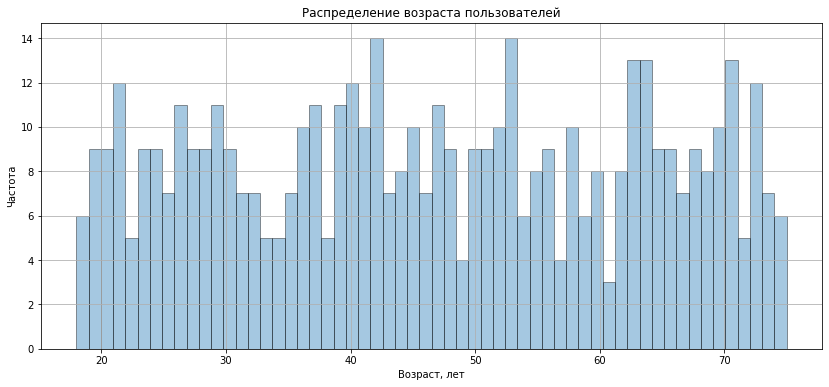

In [4]:
users['age'].plot.hist(bins=58, edgecolor='black',figsize=(14, 6), grid=True, alpha=0.4)
plt.title('Распределение возраста пользователей')
plt.ylabel('Частота')
plt.xlabel('Возраст, лет');

In [5]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

**Вывод по данным:**

Предоставлена информация по звонкам, смс и интернет-траффику 500 пользователей за 2018 год. Имеются данные по пользователям и тарифам.

**users:**
* 500 строк с уникальными user_id.   
* 76 уникальных городов. Москва - 99 строк, разных видов написания нет.     
* 38 клиентов прекратили пользоваться тарифом на момент выгрузки.  
* smart - 351 строка (70%), ultra - 149 строк (30%).  
* 58 значений возраста. Распределены от 17 до 75 без перекосов.   
* churn_date и reg_date необходимо преобразовать в datetime  
* reg_date - без перекосов, 
* churn_date с увеличением даты встречается чаще (похоже на нормальный отток)  

**calls:**
* 202607 строк с уникальными id.   
* 492 уникальных user_id. 8 пользователей не осуществляли звонки. 
* 39613 звонков длительностью (duration) = 0, среднее время 6.76 мин., медиана 6.00 мин.
* Вероятно duration=0 обозначает что user_id не дозвонился, звонок сорвался, был сброшен. Такие звонки не тарифицируются и учитывать их в исследовании не имеет смысла.
* Без звонков 0 продолжительности среднее увеличивается до 8.40, медиана до 7.74 
* call_date необходимо преобразовать в datetime 
* необходимо учитывать что длительность звонка округляется в большую сторону  

**messages:**
* 123036 строк с уникальными id.   
* 426 уникальных user_id. 74 пользователя не СМСят - прямо как Мачете.

**internet:**
* 149396 строк с уникальными id.   
* 497 уникальных user_id. 3 пользователя не используют мобильный интернет.
* 19598 сессий с 0 интернет-трафиком, средний расход 370 Мбайт., медиана 348 Мбайт
* По аналогии со звонками 0 трафик необходимо исключить.
* После удаления средний расход 426 Мбайт., медиана 400 Мбайт
* Нужно уточнить в какой момент округляется трафик. Пока считаем что траффик округляется по окончании каждой сессии.
* В данные подтягивается лишний столбец с индексами 'Unnamed: 0'.


<a name="3"></a>
## Подготовка данных

In [6]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

Удалим строки с 0 продолжительностью звонка. Причины и последствия см. выше (вывод по данным calls).

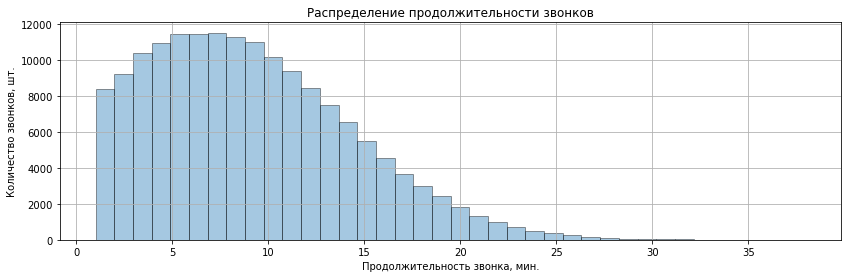

In [7]:
calls = calls.loc[calls.loc[:, 'duration'] > 0]
calls['duration'] = np.ceil(calls['duration'])  # округляем в большую сторону
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

calls['duration'].hist(bins=38, edgecolor='black', figsize=(14, 4), grid=True, alpha=0.4)
plt.title('Распределение продолжительности звонков')
plt.ylabel('Количество звонков, шт.')
plt.xlabel('Продолжительность звонка, мин.');

In [8]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

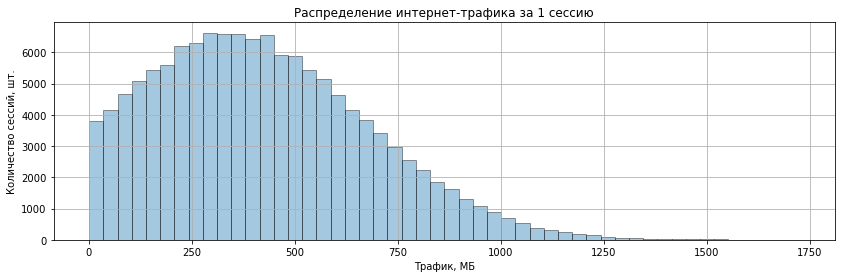

In [9]:
internet = internet.loc[internet.loc[:, 'mb_used'] > 0]

# Считаем что траффик необходимо округлять до целых Мб по окончании каждой сессии в большую сторону.
internet['mb_used'] = np.ceil(internet['mb_used'])
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

# удаляю лишний столбец 'Unnamed: 0'
internet.drop(['Unnamed: 0'], axis='columns', inplace=True)

internet.hist(column='mb_used', bins=50, edgecolor='black', figsize=(14, 4), grid=True, alpha=0.4)
plt.title('Распределение интернет-трафика за 1 сессию')
plt.ylabel('Количество сессий, шт.')
plt.xlabel('Трафик, МБ');

Графики без перекосов, распределения нормальные, выбросы в норме.

<a name="31"></a>
### Распределение по месяцам
Посмотрим как ведут себя данные в зависимости от месяца.

<a name="311"></a>
#### Суммарные данные (общие) - количество звонков, выходов в интернет, смс
**Звонки**

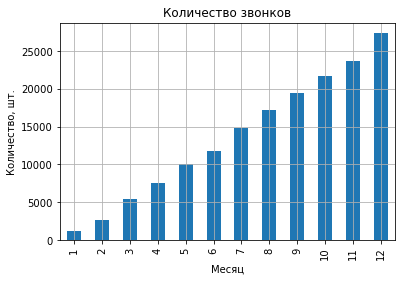

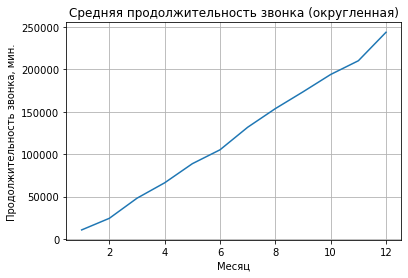

In [10]:
calls_pivot = calls.pivot_table(index=calls['call_date'].dt.month, 
                                values='duration', 
                                aggfunc=('count', 'sum', 'mean', 'median'))

calls_pivot['count'].plot(kind="bar", grid=True, legend=False)
plt.title('Количество звонков')
plt.ylabel('Количество, шт.')
plt.xlabel('Месяц')
plt.show()

calls_pivot['sum'].plot(grid=True, legend=False)
plt.title('Средняя продолжительность звонка (округленная)') 
plt.ylabel('Продолжительность звонка, мин.')
plt.xlabel('Месяц');

In [11]:
calls_pivot.style.bar(subset=['count', 'sum'], color='Chartreuse', vmin=0).set_caption(
    'Количество, средняя, медианная и суммарная продолжительность звонков по месяцам') #color='skyblue'

,count,mean,median,sum
call_date,,,,
1,1164,9.264605,9.000000,10784.000000
2,2705,9.040665,8.000000,24455.000000
3,5383,8.945012,8.000000,48151.000000
4,7504,8.836620,8.000000,66310.000000
5,10116,8.779162,8.000000,88810.000000
6,11833,8.888701,8.000000,105180.000000
7,14780,8.913802,8.000000,131746.000000
8,17257,8.906415,8.000000,153698.000000
9,19446,8.920858,8.000000,173475.000000


**Интернет-сессии**

,count,mean,median,sum
session_date,,,,
1,966,422.580745,397.5,408213.0
2,2263,422.601856,394.0,956348.0
3,4262,425.612389,401.5,1813960.0
4,5692,427.988580,402.0,2436111.0
5,8209,430.002802,405.0,3529893.0
6,9656,433.385460,405.0,4184770.0
7,11788,427.154649,402.0,5035299.0
8,14009,428.662003,404.0,6005126.0
9,15198,424.722398,399.0,6454931.0


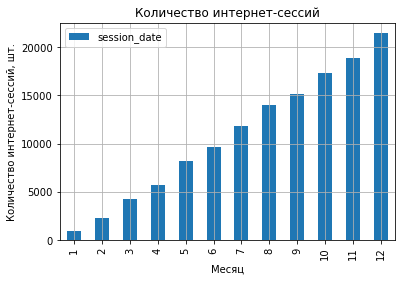

In [12]:
display(internet.pivot_table(index=internet['session_date'].dt.month, 
                             values='mb_used',
                             aggfunc=('count', 'sum', 'mean', 'median')))

internet.pivot_table(index=internet['session_date'].dt.month, 
                     values='session_date',
                     aggfunc=('count')).plot(kind="bar", grid=True)
plt.title('Количество интернет-сессий')
plt.ylabel('Количество интернет-сессий, шт.')
plt.xlabel('Месяц');

**СМС**

,id
message_date,
1,924
2,1924
3,3648
4,5179
5,7298
6,8983
7,11320
8,13088
9,14759


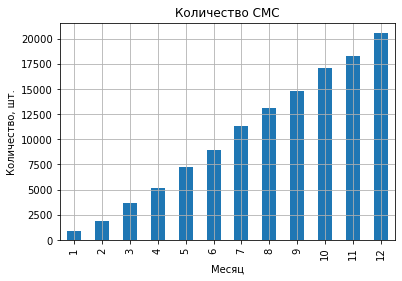

In [13]:
display(messages.pivot_table(index=messages['message_date'].dt.month,
                             values='id',
                             aggfunc=('count')))

messages.pivot_table(index=messages['message_date'].dt.month, 
                     values='message_date', 
                     aggfunc=('count')).plot(kind="bar", grid=True, legend=False)
plt.title('Количество СМС')
plt.ylabel('Количество, шт.')
plt.xlabel('Месяц');

Видно почти линейный рост количества звонков, интернет-сессий и СМС в течении года.

Проверим количество уникальных пользователей, совершавших звонки в каждом месяце

call_month
1      42
2      81
3     114
4     164
5     205
6     244
7     288
8     336
9     369
10    411
11    444
12    470
Name: user_id, dtype: int64


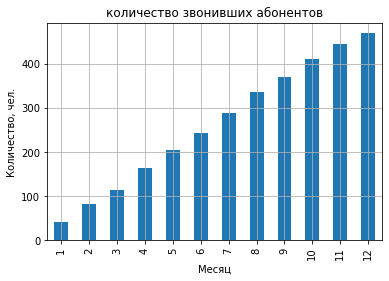

In [14]:
calls['call_month']=calls['call_date'].dt.month #добавляем столбец с месяцем
print(calls.groupby('call_month')['user_id'].nunique())
calls.groupby('call_month')['user_id'].nunique().plot(
    kind='bar', grid=True);
plt.title('количество звонивших абонентов')
plt.ylabel('Количество, чел.')
plt.xlabel('Месяц');

In [ ]:
(calls.sort_values(by='call_month', ascending=False).reset_index(drop=True).style
                                        .bar(subset=['user_id'], color='#97F0AA', vmin=0, width=100)
                                        .set_caption('Данные по количеству совершенных полетов по каждой модели самолета')
)

Количество абонентов тарифных планов «Смарт» и «Ультра» ежемесячно увеличивается.  
Это объясняет линейный рост количественных показателей (звонков, интернет-сессий и СМС) в течении года. 

In [ ]:
users[users['tariff']=='smart']['reg_date'].dt.month.plot(kind='hist', y='reg_date', color='lime', 
 histtype='step', linewidth=2, bins=12, range=(1, 12), label='подключено smart', legend=True)
users[users['tariff']=='ultra']['reg_date'].dt.month.plot(kind='hist', y='reg_date', color='gold',
 histtype='step', linewidth=2, bins=12, range=(1, 12), label='подключено ultra', legend=True)
users[users['tariff']=='smart']['churn_date'].dt.month.plot(kind='hist', y='reg_date', color='green',
 histtype='step', bins=12, range=(1, 12), label='отключено smart', legend=True)
users[users['tariff']=='ultra']['churn_date'].dt.month.plot(kind='hist', y='reg_date', color='orange',
 histtype='step', bins=12, range=(1, 12), label='отключено ultra', legend=True, ylim=(0, 54));
plt.title("количество подключений и отключений тарифов по месяцам") 
plt.ylabel("Количество, шт.")
plt.xlabel("Месяц");


<div class="alert alert-block alert-success">
<b>Success:</b> Отличная визуализация, хоть и оформленна не совсем по стандартам.

In [ ]:
тут

<a name="312"></a>
#### Данные по пользователям - количество звонков, израсходованных минут, смс, Гб траффика
**Количество звонков**

In [ ]:
calls_count=calls.pivot_table(
    index='user_id', columns='call_month', values='duration', aggfunc=('count'))
# NaT в churn_date обозначает что клиент не отказался от тарифа на конец 2018г.
end_2018=pd.datetime.strptime('2018-12-31', '%Y-%m-%d') #31 декабря 2018г
users['churn_date']=users['churn_date'].fillna(end_2018) # Заполним пропуски концом исследуемого периода
#выделим тарифы user_id и даты регистрации/отключения в отдельный df
user_id_tariff=users.loc[:, ['user_id', 'tariff', 'reg_date', 'churn_date']]
display(calls_count.head(3))

<a name="pre_1_5"></a>
**Количество израсходованных минут**

In [ ]:
calls_sum=calls.pivot_table(index='user_id', columns='call_month', values='duration', aggfunc=('sum')).reset_index()
#добавим тариф. how ='left' добавит строки не звонивших в течении всего года 
calls_sum=pd.merge(user_id_tariff, calls_sum, how ='left', on ='user_id')
calls_sum.set_axis(
    ['user_id', 'tariff', 'reg_date', 'churn_date', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    , axis='columns', inplace=True)
display(calls_sum.head(3))

<div class="alert alert-info" role="alert">
Что-то не разобрался как можно построить общую гистограмму по значениям 12 столбцов для такой сводной таблицы. Поэтому собираю её значения в один столбец.  
    
Можно было сразу сгруппировать pivot_table(index=('user_id', 'call_month'), values='duration', aggfunc=('sum')) в один столбец, но в дальнейшем обрабатываю "широкие" pivot_table (как более наглядные) - поэтому везде строю "широкие" и потом собираю из них обратно "узкие".
    
Еще можно было посчитать средние значения в месяц по каждому user_id и работать с ними, но насколько я понимаю это более "грязный" вариант.
</div>

<div class="alert alert-block alert-warning">
Тут можно было бы смерджить user_id и calls, не делая pivot, а по такой таблице агрегировать

In [ ]:
calls_sum_12=pd.DataFrame() #соберем обратно в один стролбец
for col in range (1, 13):
    calls_sum_n=calls_sum.loc[:, ['user_id', 'tariff', str(col)]]
    calls_sum_n.set_axis(['user_id', 'tariff', 'calls_sum'], axis='columns', inplace=True)
    calls_sum_12=calls_sum_12.append(calls_sum_n, ignore_index=True)
display(calls_sum_12.loc[5499:5502])

In [ ]:
#строим распределение суммы звонков в месяц по году
calls_sum_12.hist(column='calls_sum', bins=15, range=(0, 1500), edgecolor = 'black')
calls_sum_12['calls_sum'].describe()
plt.title("Распределение количества звонков"); 
plt.ylabel("Количество пользователей, чел.")
plt.xlabel("Количество звонков, шт.")

#строим распределение суммы звонков в месяц помесячно
calls_sum.loc[:, ['1', '2', '3', '5', '7', '9']].hist(bins=15, range=(0, 1500), edgecolor = 'black');

В начале года новые клиенты (совершающие звонки не с начала месяца) заметно влияют на суммарную продолжительность разговоров. Начиная с марта, а также по году отчетливо виден пик в районе 400-500 минут.

<a name="pre_1_6"></a>
**Количество израсходованных СМС**

In [ ]:
messages['message_month']=messages['message_date'].dt.month #добавляем столбец с месяцем
messages_count=messages.pivot_table(index='user_id', columns='message_month', values='id', aggfunc=('count')).reset_index()
#добавим тариф. how ='left' добавит строки не отправлявших СМС 
messages_count=pd.merge(user_id_tariff, messages_count, how ='left', on ='user_id')
messages_count.set_axis(
    ['user_id', 'tariff', 'reg_date', 'churn_date', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    , axis='columns', inplace=True)
display(messages_count.head(10))

messages_count_12=pd.DataFrame() #соберем обратно в один стролбец
for col in range (1, 13):
    messages_count_n=messages_count.loc[:, ['user_id', 'tariff', str(col)]]
    messages_count_n.set_axis(['user_id', 'tariff', 'messages_count'], axis='columns', inplace=True)
    messages_count_12=messages_count_12.append(messages_count_n, ignore_index=True)
# display(messages_count_12.loc[5499:5502])
display(messages_count_12.head(10))

<div class="alert alert-block alert-warning">
<b>Remarks:</b>
    
если я правильн опонял идею - в `messages_count_12` должна лежать сумма сооббщений каждого пользователя (аналогично с остальными таблицами). не выйдет сразу записать сумму в последний столбец? чтобы была стрктура вида "id - tariff - count_sum"?

<div class="alert alert-block alert-info">
<b>Fixed:</b> 
Изначально была именно такая идея (или среднее в месяц), но в дальнейшем необходимо помесячно анализировать разные показатели (минуты, СМС, Мб) для разных пользователей и такой подход не подошел.  
    
В `messages_count_12` сумма сообщений по каждому пользователю отдельно по каждому из 12 месяцев + NaN для месяцев до подключения/после отключения и 0 в месяцы когда пользователь просто не отправлял СМС
</div>

<a name="pre_1_8"></a>
**Количество израсходованных Мб**

In [ ]:
internet['session_month']=internet['session_date'].dt.month #добавляем столбец с месяцем
internet_mb_sum=internet.pivot_table(index='user_id', columns='session_month', values='mb_used', aggfunc=('sum')).reset_index()
#добавим тариф. how ='left' добавит строки не пользовавшихся мобильным интернетом в течении года 
internet_mb_sum=pd.merge(user_id_tariff, internet_mb_sum, how ='left', on ='user_id')
internet_mb_sum.set_axis(
    ['user_id', 'tariff', 'reg_date', 'churn_date', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    , axis='columns', inplace=True)
display(internet_mb_sum.head(3))

internet_mb_sum_12=pd.DataFrame() #соберем обратно в один стролбец
for col in range (1, 13):
    internet_mb_sum_n=internet_mb_sum.loc[:, ['user_id', 'tariff', str(col)]]
    internet_mb_sum_n.set_axis(['user_id', 'tariff', 'internet_mb_sum'], axis='columns', inplace=True)
    internet_mb_sum_12=internet_mb_sum_12.append(internet_mb_sum_n, ignore_index=True)
display(internet_mb_sum_12.loc[5499:5502])

<a name="pre_1_9"></a>
**Количество израсходованных Гб**

Включенный в тарифы трафик кратен целым Гб. В случае превышения включенного в тариф (или оплаченного пакета) трафика происходит автоматическое подключение и оплата пакета = 1 Гб. Таким образом интернет-трафик (включенный и превышенный) можно учитывать кратно 1 Гб с округлением в большую сторону.

In [ ]:
internet_gb_sum=internet_mb_sum.copy(deep=True)
for col in list(internet_gb_sum.loc[:, '1':'12']):
    internet_gb_sum[col]=np.ceil(internet_gb_sum[col]/1024) #Считаем  кол-во Гб и округляем
display(internet_gb_sum.head(3))    

**Поправим информацию о тарифах**

In [ ]:
#добавим столбец с количеством включенных гигабайт
tariffs['gb_per_month_included']=tariffs['mb_per_month_included']/1024
#установим названия тарифов в качестве индексов
display(tariffs)
tariffs=tariffs.set_index('tariff_name')
display(tariffs)
tariffs.index.name = None
display(tariffs)

<a name="32"></a>
### Подсчет выручки по месяцам

In [ ]:
#блок обрабатывает таблицы значений по месяцам
#parametr='minutes_included'               #столбец тарифа с количеством включенных минут, СМС, гигабайт
#parametr2='rub_per_minute'                #столбец тарифа с ценой минуты, СМС, гигабайта сверх лимита
def month_pay(row):                        #функция получает строку
    _tar=row['tariff']                     #"выдергиваем# тариф
    _included=tariffs.loc[_tar, parametr]  #количество включенных минут/СМС/гигабайт соответствующего тарифа
    _rub=tariffs.loc[_tar, parametr2]      #стоимость превышения минут/СМС/гигабайт для соответствующего тарифа
    _in=row['reg_date'].month              #месяц подключения (int)
    _out=row['churn_date'].month           #месяц отключения (int)
    _z=row[str(col)]                       #проверяемое значение (str)
    try:
        if _in<=col and col<=_out:         #если месяц между регистрацией и отключением (int)
            if _z<=_included or _z!=_z:    #если лимит не превышен или не было звонков, СМС, использования интернета (NaN)
                _z=0                       #дополнительная плата не взымается (присваиваем 0)
            else:                          #иначе
                _z=(_z-_included)*_rub     #превышение считаем по тарифу
        else:                              #момент до регистрации/после отключения
            if _z==_z:                     #в ячейке не NaN
                return 'ошибка дат'
        return _z            
    except:
        return 'error z' 


<div class="alert alert-block alert-success">
<b>Success:</b> Очень хорошая автоматизация. Аннотации к функциям гораздо удобнее писать в начале, а не к каждой строке, используя докстринги.

**Подсчет выручки за звонки по месяцам**

In [ ]:
calls_pay=calls_sum.copy(deep=True)
parametr='minutes_included'                                  #столбец тарифа с количеством включенных минут
parametr2='rub_per_minute'                                   #столбец тарифа с ценой минуты сверх лимита
for col in range (1, 13):                                    #для столбцов суммарных значений по месяцам
    calls_pay[str(col)]=calls_pay.apply(month_pay, axis=1)   #применяем функцию
calls_pay=calls_pay.set_index('user_id')                     #устанавливаем user_id в качестве индекса
calls_pay.index.name = None
display(calls_pay.head(3))

In [ ]:
calls_pay_12=pd.DataFrame() #соберем обратно в один стролбец
for col in range (1, 13):
    calls_pay_n=calls_pay.loc[:, ['tariff', str(col)]]
    calls_pay_n.set_axis(['tariff', 'calls_pay'], axis='columns', inplace=True)
    calls_pay_12=calls_pay_12.append(calls_pay_n, ignore_index=True)
display(calls_pay_12.loc[5499:5502])

**Подсчет выручки за СМС по месяцам**

In [ ]:
messages_pay=messages_count.copy(deep=True)
parametr='messages_included'                                    #столбец тарифа с количеством включенных СМС
parametr2='rub_per_message'                                     #столбец тарифа с ценой СМС сверх лимита
for col in range (1, 13):                                       #для столбцов суммарных значений по месяцам
    messages_pay[str(col)]=messages_pay.apply(month_pay, axis=1)#применяем функцию
messages_pay=messages_pay.set_index('user_id')                  #устанавливаем user_id в качестве индекса
messages_pay.index.name = None
display(messages_pay.head(3))

In [ ]:
messages_pay_12=pd.DataFrame() #соберем обратно в один стролбец
for col in range (1, 13):
    messages_pay_n=messages_pay.loc[:, ['tariff', str(col)]]
    messages_pay_n.set_axis(['tariff', 'messages_pay'], axis='columns', inplace=True)
    messages_pay_12=messages_pay_12.append(messages_pay_n, ignore_index=True)
display(messages_pay_12.loc[5499:5502])

**Подсчет выручки за трафик по месяцам**

In [ ]:
internet_pay=internet_gb_sum.copy(deep=True)
parametr='gb_per_month_included'                                   #столбец тарифа с количеством включенных гигабайт
parametr2='rub_per_gb'                                             #столбец тарифа с ценой гигабайта сверх лимита
for col in range (1, 13):                                          #для столбцов суммарных значений по месяцам
    internet_pay[str(col)]=internet_gb_sum.apply(month_pay, axis=1)#применяем функцию
internet_pay=internet_pay.set_index('user_id')                     #устанавливаем user_id в качестве индекса
internet_pay.index.name = None
display(internet_pay.head(3))

In [ ]:
internet_pay_12=pd.DataFrame() #соберем обратно в один стролбец
for col in range (1, 13):
    internet_pay_n=internet_pay.loc[:, ['tariff', str(col)]]
    internet_pay_n.set_axis(['tariff', 'internet_pay'], axis='columns', inplace=True)
    internet_pay_12=internet_pay_12.append(internet_pay_n, ignore_index=True)
display(internet_pay_12.loc[5499:5502])

<a name="33"></a>
### Подсчет абонентской платы

In [ ]:
def month_abonent_pay(row):                                             #функция получает строку
    _tar=row['tariff']                                                  #"выдергиваем тариф"
    _rub=tariffs.loc[_tar, 'rub_monthly_fee']                           #абонентская плата соответствующего тарифа
    try:
        if row['reg_date'].month<=col and col<=row['churn_date'].month: #если месяц в нужном диапазоне
            return _rub                                                 #считаем абонентскую плату
    except:
        return 'error _rub'    



**Абонентская плата по месяцам

In [ ]:
abonent_pay=users.copy(deep=True)

for col in range (1, 13):                                               #для каждого из 12 месяцев
    abonent_pay[str(col)]=abonent_pay.apply(month_abonent_pay, axis=1)  #применяем функцию

abonent_pay=abonent_pay.set_index('user_id')                            #устанавливаем user_id в качестве индекса
abonent_pay.index.name = None

display(abonent_pay.head(3))

**Подсчет суммарной выручки по месяцам.**

In [ ]:
total_pay=calls_pay.loc[:, '1':'12']+messages_pay.loc[:, '1':'12']+internet_pay.loc[:, '1':'12']+abonent_pay.loc[:, '1':'12']
#добавим столбец 'user_id'
total_pay['user_id']=total_pay.index
#добавим тариф и город
total_pay=pd.merge(users.loc[:, ['user_id', 'city', 'tariff']], total_pay, how ='left', on ='user_id')
display(total_pay.head(10))

In [ ]:
total_pay_12=pd.DataFrame() #соберем обратно в один стролбец
for col in range (1, 13):
    total_pay_n=total_pay.loc[:, ['user_id', 'city', 'tariff', str(col)]]
    total_pay_n.set_axis(['user_id', 'city', 'tariff', 'total_pay'], axis='columns', inplace=True)
    total_pay_12=total_pay_12.append(total_pay_n, ignore_index=True)
display(total_pay_12.loc[5499:5502])

<div class="alert alert-block alert-warning">
<b>Remarks:</b> хоть мне и кажется, что подход с созданием таких датасетов чрезмерене, с задачей ты справился. однако каждый раз используется аналогичный код. Было бы здорово такие задачи автоматизировать

<div class="alert alert-block alert-info">
<b>Fixed:</b> 
Согласен. Сейчас выбрал бы более простую последовательность действий для обработки данных, и вижу как можно было автоматизировать мой подход. 
</div>

<a name="Analysis"></a>
## Анализ данных
Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

<a name="Analysis_1"></a>
### Суммарная выручка Москва / не Москва

In [ ]:
region_total_pay_12=total_pay_12.copy(deep=True)

region_total_pay_12['city']=region_total_pay_12['city'].where(
    region_total_pay_12['city']=='Москва', 'Не Москва') 

region_total_pay_12.groupby('city')['total_pay'].plot(kind='hist', y='total_pay', histtype='step',
    linewidth=2, bins=14, range=(500, 4000), density=True, title='Распределение суммарной выручка в месяц', legend=True)

plt.ylabel("Доля пользователей тарифа")
plt.xlabel("Выручка, руб.")

region_total_pay_12.groupby('city')['total_pay'].describe()


<div class="alert alert-block alert-success">
<b>Success:</b> Очень хорошо

Видны явные пики в районе абонентской платы обозначающие что большинство пользователей не выходят за рамки включенных в тариф минут/СМС/Мб. Также видно что доля smart (первый пик) и ultra (второй пик) для москвы и регионов различается.

<a name="Analysis_2"></a>
### Количество и средняя выручка по тарифам Москав / не Москва

In [ ]:
region_total_pay_12.pivot_table(
    index=('city', 'tariff'), values='total_pay', aggfunc=('count', 'mean',))

In [ ]:
region_total_pay_12.query('city=="Москва" and total_pay>=0')['tariff'].value_counts().plot.pie(
    figsize=(3, 3), title='Соотношение тарифов пользователей в Москве', autopct='%.1f')
plt.ylabel("Тариф")
plt.show()
region_total_pay_12.query('city!="Москва" and total_pay>=0')['tariff'].value_counts().plot.pie(
    figsize=(3, 3), title='Соотношение тарифов пользователей в регионах', autopct='%.1f')
plt.ylabel("Тариф");

В Москве бОльшая доля пользователей тарифа ultra чем в регионах.  
Средний платеж по каждому тарифу для Москвы почти не отличается от других регионов.

<div class="alert alert-info" role="alert">
Можно выводить plot одной строкой после groupby (как выше), но для такого варианта не сообразил как назначить цвета линий (а хочется smart - зеленый, ultra - золотой) - поэтому дальше вывожу двумя plot. Комментарии не пишу - всё однотипно.
</div>

<div class="alert alert-block alert-warning">
<b>Remarks:</b> опять же, однотипно - значит следует автоматизировать :)

<a name="Analysis_3"></a>
### Сравнение smart / ultra

#### Суммарная выручка smart / ultra

In [ ]:
p_smart=total_pay_12.reset_index().query('tariff=="smart"')
p_ultra=total_pay_12.reset_index().query('tariff=="ultra"')

ax=p_smart.plot(kind='hist', y='total_pay', color='lime', histtype='step', linewidth=2, 
    bins=14, range=(500, 4000), density=True, label='Выручка в месяц smart', legend=True)
p_ultra.plot(kind='hist', y='total_pay', color='gold', histtype='step', linewidth=2, 
    bins=14, range=(500, 4000), density=True, label='Выручка в месяц ultra', legend=True, ax=ax)
plt.title("Распределение суммарной выручки smart / ultra"); 
plt.ylabel("Доля пользователей тарифа")
plt.xlabel("Выручка, руб.");
total_pay_12.groupby('tariff')['total_pay'].describe()

<a name="Analysis_4"></a>
#### Минут smart / ultra

In [ ]:
с_smart=calls_sum_12.query('tariff=="smart"')
с_ultra=calls_sum_12.query('tariff=="ultra"')
ax=с_smart.plot(kind='hist', y='calls_sum', color='lime', histtype='step', linewidth=2, 
        bins=15, range=(0, 1500), density=True, label='Минут в месяц smart', legend=True)
с_ultra.plot(kind='hist', y='calls_sum', color='gold', histtype='step', linewidth=2, 
        bins=15, range=(0, 1500), density=True, label='Минут в месяц ultra', legend=True, ax=ax)
plt.title("Распределение количества минут разговоров в месяц smart / ultra"); 
plt.ylabel("Доля пользователей тарифа")
plt.xlabel("Продолжительность разговоров в месяц, мин.");
calls_sum_12.groupby('tariff')['calls_sum'].describe()

In [ ]:
for _tarif in tariffs.index:
    print(_tarif, 'минуты')
    
    print('Среднее количество минут для тарифа', _tarif, ': {:.0f} минут'.format(
        calls_sum_12[calls_sum_12['tariff']==_tarif]['calls_sum'].mean()))   
    
    print('Дисперсия для тарифа', _tarif, ': {:.0f} квадратных минут'.format(
        np.var(calls_sum_12[calls_sum_12['tariff']==_tarif]['calls_sum'], ddof=1)))
    
    print('Стандартное отклонение для тарифа', _tarif, ': {:.0f} минут'.format(
        np.std(calls_sum_12[calls_sum_12['tariff']==_tarif]['calls_sum'], ddof=1)))

<a name="Analysis_5"></a>
#### Выручка за звонки smart / ultra

In [ ]:
cp_smart=calls_pay_12.reset_index().query('tariff=="smart"')
cp_ultra=calls_pay_12.reset_index().query('tariff=="ultra"')

ax=cp_smart.plot(kind='hist', y='calls_pay', color='lime', histtype='step', linewidth=2, 
    bins=20, range=(1, 1001), label='Выручка за звонки в месяц smart', legend=True)
cp_ultra.plot(kind='hist', y='calls_pay', color='gold', histtype='step', linewidth=2, 
    bins=20, range=(1, 1001), label='Выручка за звонки в месяц ultra', legend=True, ax=ax)
plt.title("Распределение суммарной выручки за звонки smart / ultra"); 
plt.ylabel("Доля пользователей тарифа")
plt.xlabel("Выручка, руб.");
calls_pay_12.groupby('tariff')['calls_pay'].describe()

<a name="Analysis_6"></a>
#### СМС smart / ultra

In [ ]:
m_smart=messages_count_12.query('tariff=="smart"')
m_ultra=messages_count_12.query('tariff=="ultra"')
ax=m_smart.plot(kind='hist', y='messages_count', color='lime', histtype='step', linewidth=2, 
        bins=13, range=(0, 260), density=True, label='СМС в месяц smart', legend=True)
m_ultra.plot(kind='hist', y='messages_count', color='gold', histtype='step', linewidth=2, 
        bins=13, range=(0, 260), density=True, label='СМС в месяц ultra', legend=True, ax=ax)
plt.title("Распределение количества СМС в месяц smart / ultra"); 
plt.ylabel("Доля пользователей тарифа")
plt.xlabel("Количество СМС в месяц, шт.");
messages_count_12.groupby('tariff')['messages_count'].describe()

In [ ]:
for _tarif in tariffs.index:
    print(_tarif, 'СМС')
    
    print('Среднее количество сообщений для тарифа', _tarif, ': {:.0f} шт.'.format(
        messages_count_12[messages_count_12['tariff']==_tarif]['messages_count'].mean())) 
    
    print('Дисперсия для тарифа', _tarif, ': {:.0f} квадратных сообщений'.format(
        np.var(messages_count_12[messages_count_12['tariff']==_tarif]['messages_count'], ddof=1)))
    
    print('Стандартное отклонение для тарифа', _tarif, ': {:.0f} сообщений'.format(
        np.std(messages_count_12[messages_count_12['tariff']==_tarif]['messages_count'], ddof=1)))

<a name="Analysis_7"></a>
#### Выручка за СМС smart / ultra

In [ ]:
mp_smart=messages_pay_12.reset_index().query('tariff=="smart"')
mp_ultra=messages_pay_12.reset_index().query('tariff=="ultra"')

ax=mp_smart.plot(kind='hist', y='messages_pay', color='lime', histtype='step', linewidth=2, 
    bins=15, range=(1, 301), label='Выручка за СМС в месяц smart', legend=True)
mp_ultra.plot(kind='hist', y='messages_pay', color='gold', histtype='step', linewidth=2, 
    bins=15, range=(1, 301), label='Выручка за СМС в месяц ultra', legend=True, ax=ax)
plt.title("Распределение суммарной выручки за СМС smart / ultra"); 
plt.ylabel("Доля пользователей тарифа")
plt.xlabel("Выручка, руб.");
messages_pay_12.groupby('tariff')['messages_pay'].describe()

<a name="Analysis_8"></a>
#### Трафик smart / ultra

In [ ]:
i_smart=internet_mb_sum_12.query('tariff=="smart"')
i_ultra=internet_mb_sum_12.query('tariff=="ultra"')
ax=i_smart.plot(kind='hist', y='internet_mb_sum', color='lime', histtype='step', linewidth=2, 
        bins=16, range=(0, 48000), density=True, label='Мб в месяц smart', legend=True)
i_ultra.plot(kind='hist', y='internet_mb_sum', color='gold', histtype='step', linewidth=2, 
        bins=16, range=(0, 48000), density=True, label='Мб в месяц ultra', legend=True, ax=ax);
plt.title("Распределение интернет-трафика в месяц smart / ultra"); 
plt.ylabel("Доля пользователей тарифа")
plt.xlabel("Трафик в месяц, Мб");
internet_mb_sum_12.groupby('tariff')['internet_mb_sum'].describe()

In [ ]:
for _tarif in tariffs.index:
    print(_tarif, 'трафик')
    
    print('Средний трафик для тарифа', _tarif, ': {:.0f} Мб.'.format(
        internet_mb_sum_12[internet_mb_sum_12['tariff']==_tarif]['internet_mb_sum'].mean())) 
    
    print('Дисперсия для тарифа', _tarif, ': {:.0f} квадратных Мб'.format(np.var(
        internet_mb_sum_12[internet_mb_sum_12['tariff']==_tarif]['internet_mb_sum'], ddof=1)))
    
    print('Стандартное отклонение для тарифа', _tarif, ': {:.0f} Мб'.format(np.std(
        internet_mb_sum_12[internet_mb_sum_12['tariff']==_tarif]['internet_mb_sum'], ddof=1)))

<a name="Analysis_9"></a>
#### Выручка за трафик smart / ultra

In [ ]:
ip_smart=internet_pay_12.reset_index().query('tariff=="smart"')
ip_ultra=internet_pay_12.reset_index().query('tariff=="ultra"')

ax=ip_smart.plot(kind='hist', y='internet_pay', color='lime', histtype='step', linewidth=2, 
    bins=20, range=(1, 4001), label='Выручка за трафик в месяц smart', legend=True)
ip_ultra.plot(kind='hist', y='internet_pay', color='gold', histtype='step', linewidth=2, 
    bins=20, range=(1, 4001), label='Выручка за трафик в месяц ultra', legend=True, ax=ax)
plt.title("Распределение суммарной выручки за интернет-трафик smart / ultra"); 
plt.ylabel("Доля пользователей тарифа")
plt.xlabel("Выручка, руб.");
internet_pay_12.groupby('tariff')['internet_pay'].describe()

<a name="Table"></a>
#### Сравнительная таблица тарифов

Исходя из выборки имеем следующие показатели для тарифов:  

Характеристика | Тариф | smart | ultra
--- |--- | --- | ---
Минуты |Среднее количество минут | 419 | 548
 |Стандартное отклонение | 189 | 306
 |Включено в тариф | 500 мин. | 3000 мин.
 |Укладываются в лимит | более половины | все
 |Средняя плата за превышение | 125 руб. | 0 руб.
--- |--- | --- | ---
Сообщения |Среднее количество сообщений | 39 | 61 
 |Стандартное отклонение | 27 | 46
 |Включено в тариф | 50 | 1000
 |Укладываются в лимит | большинство | все
 |Средняя плата за превышение | 17 руб. | 0 руб.
--- |--- | --- | ---
Трафик |Средний трафик Мб | 16244 | 19707 
 |Стандартное отклонение | 5860 | 9937
 |Включено в тариф | 15360 Мб | 30720 Мб
 |Укладываются в лимит | меньше половины | большинство
 |Средняя плата за превышение | 602 руб. | 121 руб.
--- |--- | --- | ---
Абонентская плата | Ежемесячная плата | 550 руб. | 1950 руб.  
--- --- --- |--- --- --- | --- --- --- | --- --- ---
**Итого:** | **Средняя выручка всего** | **1294 руб.** | **2071 руб.** 

Распределения нормальные. Экстремальные значения в пределах разумного.
БОльшая часть пользователей используют включенные в тариф услуги или незначительно привышают лимит, хотя есть и любители "поболтать" (1673 минут в месяц - это почти по часу в день) и СМС-сообщения (224 сообщения в месяц - возможно в бизнес-целях). Заметнее прочего превышение интернет-трафика на тарифе smart (среднее и медианное значения трафика выше включенного пакета).


<div class="alert alert-block alert-success">
<b>Success:</b> Отличная аналитика! Вот теперь видно, что все преобразования даатфреймов были не зря :)

<a name="step4"></a>
## Проверка гипотез.

    средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
    средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Пороговое значение alpha задайте самостоятельно.
Поясните:

    как вы формулировали нулевую и альтернативную гипотезы;
    какой критерий использовали для проверки гипотез и почему.

<a name="step4_1"></a>
### Проверим различается ли средняя выручка для тарифов «Ультра» и «Смарт»

Сформулируем нулевую гипотезу следующим образом: средняя выручка тарифа ultra и тарифа smart равны.
Тогда альтернативная гипотеза будет звучать как: средняя выручка тарифа ultra отличается от средней выручки тарифа smart.

In [ ]:
alpha = .05

results = st.ttest_ind(p_smart['total_pay'].dropna(), p_ultra['total_pay'].dropna(), 
                       equal_var = False) #т.к. дисперсии для тарифов различны

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средняя выручка тарифа ultra и тарифа smart отличаются с ОЧЕНЬ БОЛЬШОЙ вероятностью. Случайность такого вывода почти невозможна.

<a name="step4_2"></a>
### Проверим различается ли средняя выручка для Москвы и других городов

Сформулируем нулевую гипотезу следующим образом: средняя выручка пользователей из Москвы и пользователей из других регионов равны.
Тогда альтернативная гипотеза будет звучать как: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [ ]:
alpha = .05


moscow_total_pay_12=region_total_pay_12.query('city=="Москва" and total_pay>=0')
another_total_pay_12=region_total_pay_12.query('city=="Не Москва" and total_pay>=0')

#лучше перестрахуемся и посчитаем разницу между стандартными отклонениями (752 и 810) значительной.
results = st.ttest_ind(moscow_total_pay_12['total_pay'], another_total_pay_12['total_pay'], equal_var = False) 


print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не смотря на то что нулевая гипотеза не отвергнута на основании выборки утверждать что либо нельзя.
Средняя выручка пользователей из Москвы и пользователей из других регионов могут оказаться близки или значительно отличаться.


<div class="alert alert-block alert-success">
<b>Success:</b> Гипотезы проработаны корректно

<a name="End"></a>
## Общий вывод

Однозначно определить какой тариф лучше нельзя. Тариф ultra (хоть и приносит больше выручки) изначально ориентирован на более активных и состоятельных пользователей. У тарифа smart больше абонентов.

Сравнительная таблица тарифов по ссылке:
[Сравнительная таблица тарифов](#Table)

Графики распределений доступны по ссылкам:
* [Суммарная выручка Москва / не Москва](#Analysis_1)
* [Количество и средняя выручка по тарифам Москав / не Москва](#Analysis_2)
* [Суммарная выручка smart / ultra](#Analysis_3)  
* [Звонки](#Analysis_4)  
 * [Минут smart / ultra](#Analysis_4)  
 * [Выручка за звонки smart / ultra](#Analysis_5)  
* [СМС](#Analysis_6)       
 * [Количество СМС smart / ultra](#Analysis_6)  
 * [Выручка за СМС smart / ultra](#Analysis_7)  
* [Интернет-трафик smart / ultra](#Analysis_8)       
 * [Трафик smart / ultra](#Analysis_8)  
 * [Выручка за трафик smart / ultra](#Analysis_9)  

Гипотеза "средняя выручка тарифа ultra отличается от средней выручки тарифа smart" подтверждена.
Гипотеза "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" не подтверждена - необходима другая формулировка или больше данных.

В Москве бОльшая доля пользователей тарифа ultra чем в регионах.  
Средний платеж по каждому тарифу для Москвы почти не отличается от других регионов.

Наиболее перспективная точка роста - интернет-трафик. 


<div class="alert alert-block alert-warning">
<b>Remarks:</b> Общий вывод - резюме работы. Следует писать его так, чтоы ни один инсайд не прошел мимо :) Да и большинство заказчиков начинают (а многие и заканчивают) читать исследование именно с общего вывода.

Спасибо за замечания - все серьезные поправил, остальные буду увитыать в дальнейшем.